# Matplotlib Samples

## 2D Plot functions (multiple lines)

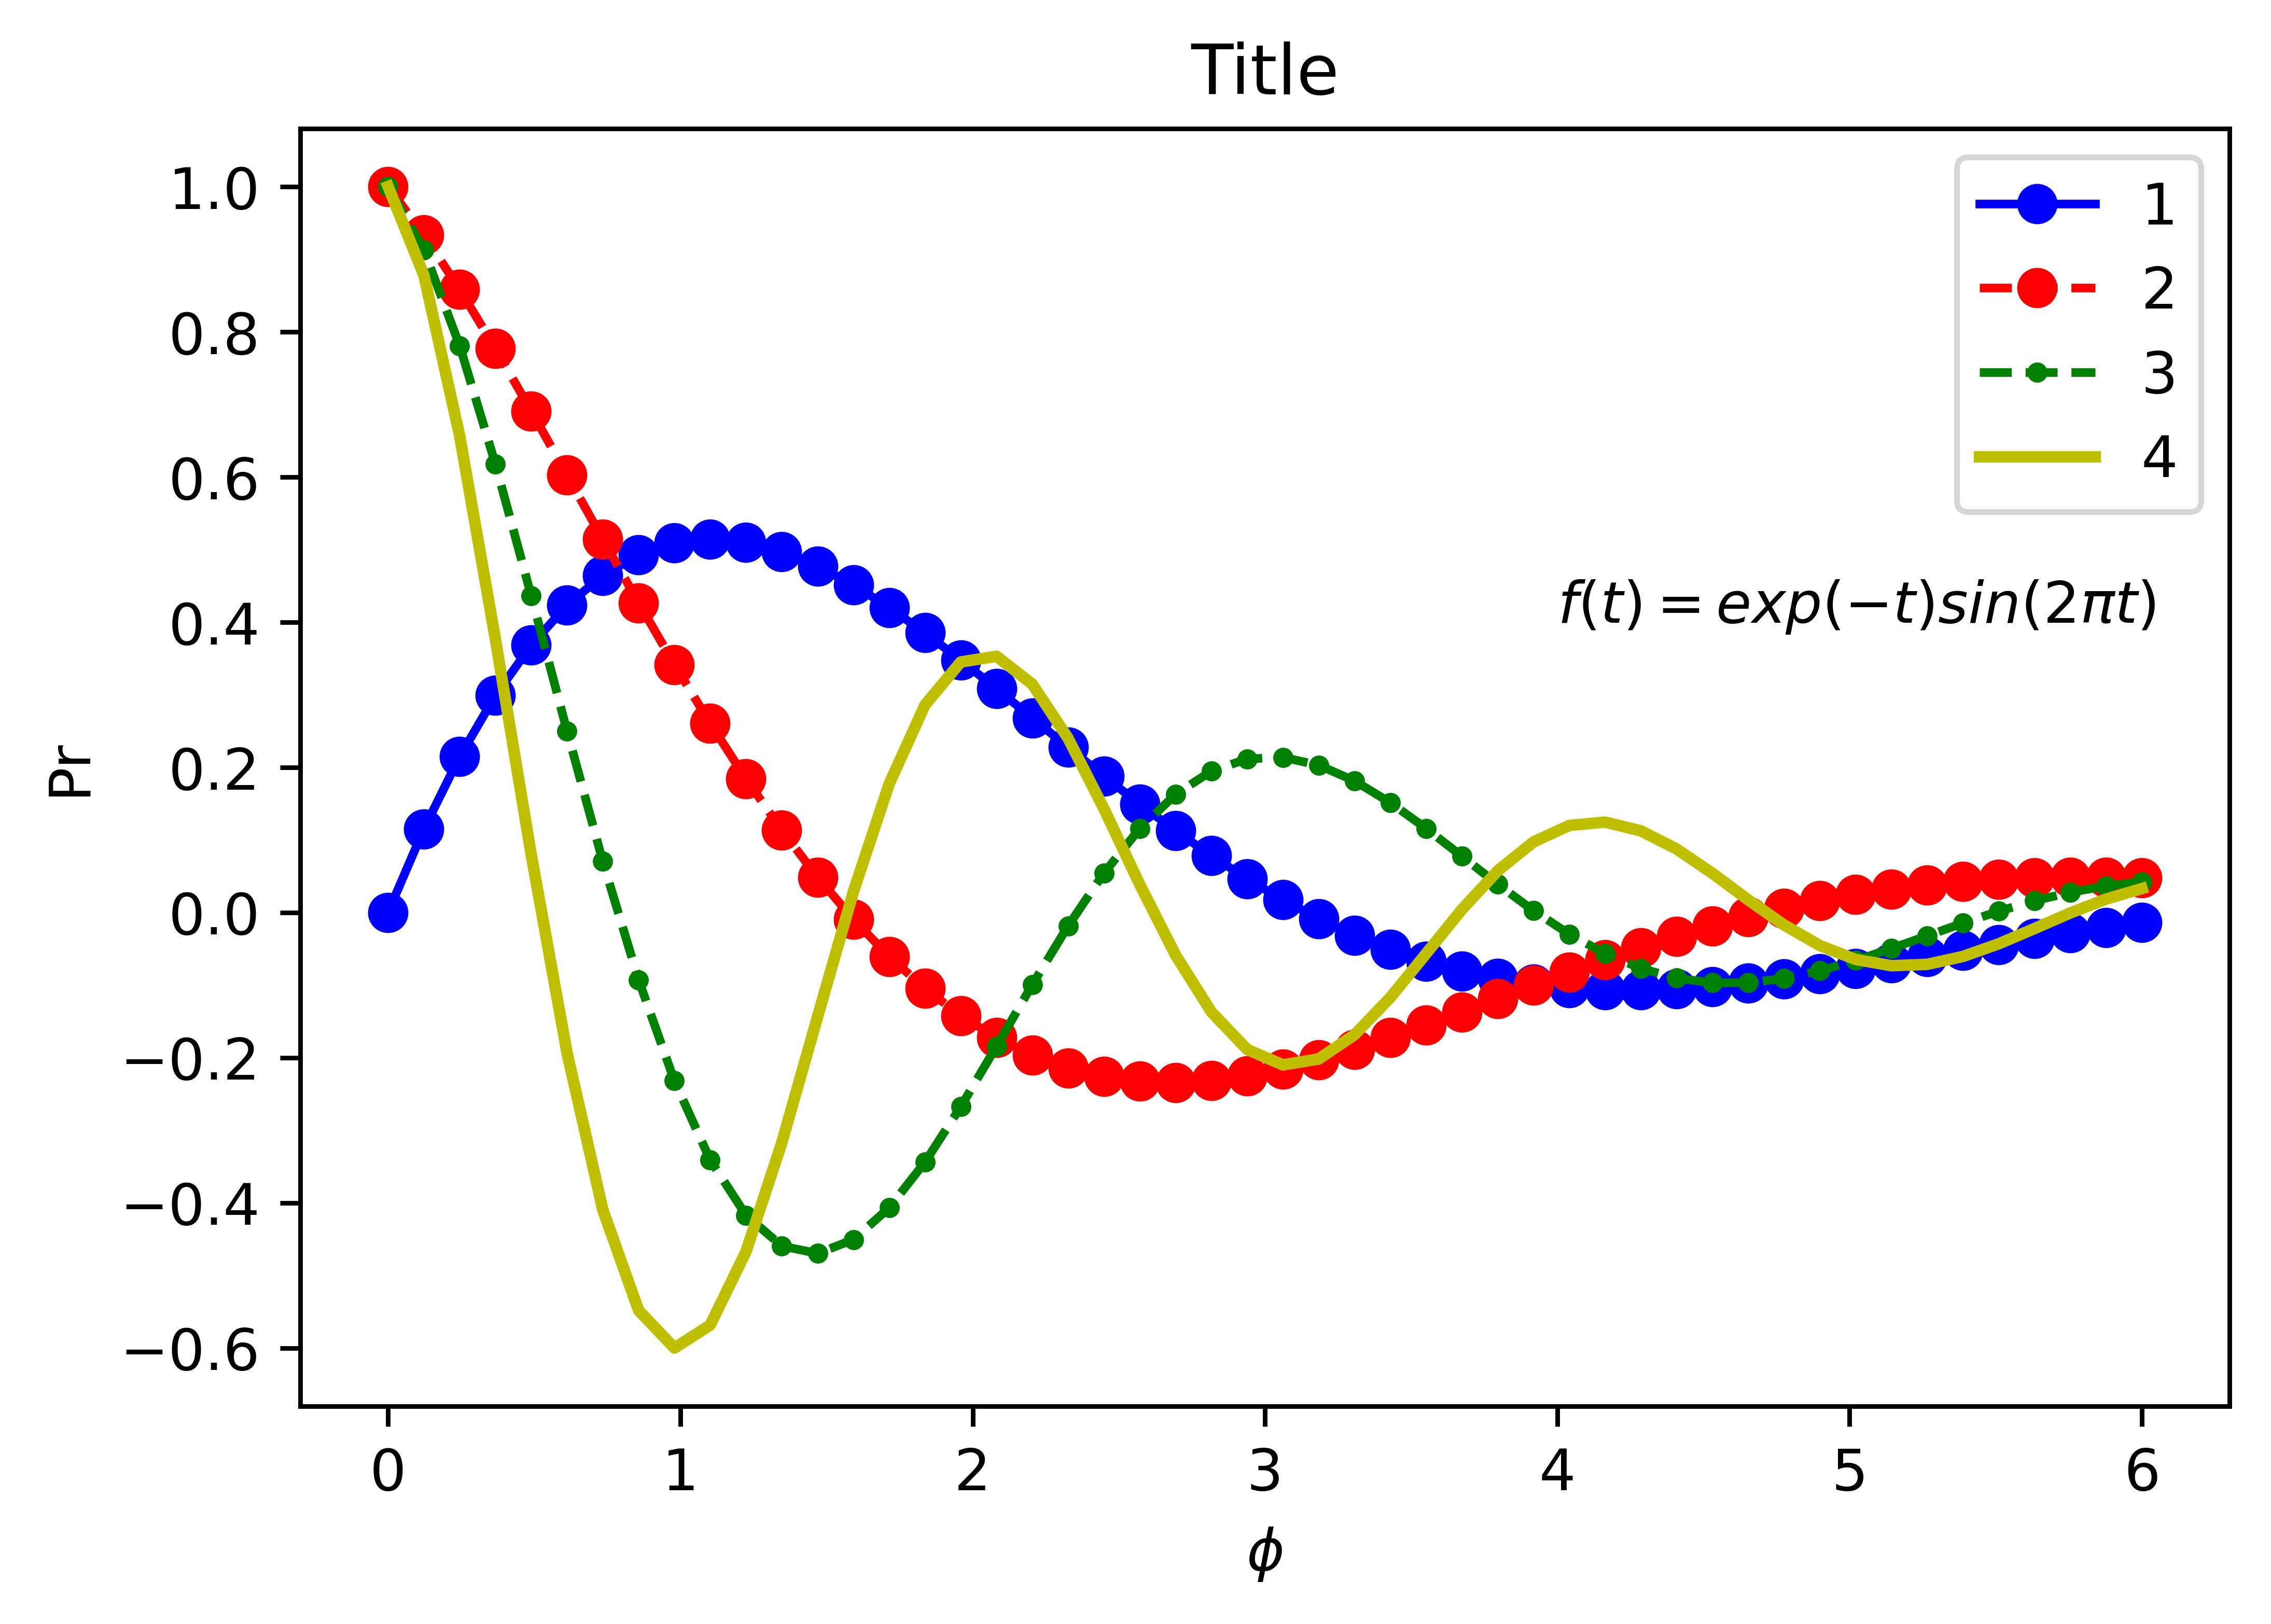

In [1]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(6, 4))
x = np.linspace(0,6,50)
y1= np.exp(-0.5*x) * np.sin(x)
y2= np.exp(-0.5*x) * np.cos(x)
y3= np.exp(-0.5*x) * np.cos(2*x)
y4= np.exp(-0.5*x) * np.cos(3*x)
ax.plot(x, y1, 'bo-')
ax.plot(x, y2, 'ro--')
ax.plot(x, y3, 'g.--', markersize=5)
ax.plot(x, y4, 'y-', linewidth=2)
# ax.set_xlim(0, 7)
# ax.set_ylim(-1, 1.5)
ax.set_xlabel(r'$ \phi $')
ax.set_ylabel('Pr')
ax.set_title('Title')
ax.text(4, 0.4, r'$f(t) = exp(-t) sin(2 \pi t)$')
ax.legend(('1', '2', '3', '4'), loc='upper right')
fig.savefig('transparent.png', transparent=True, dpi=400)

### subplot

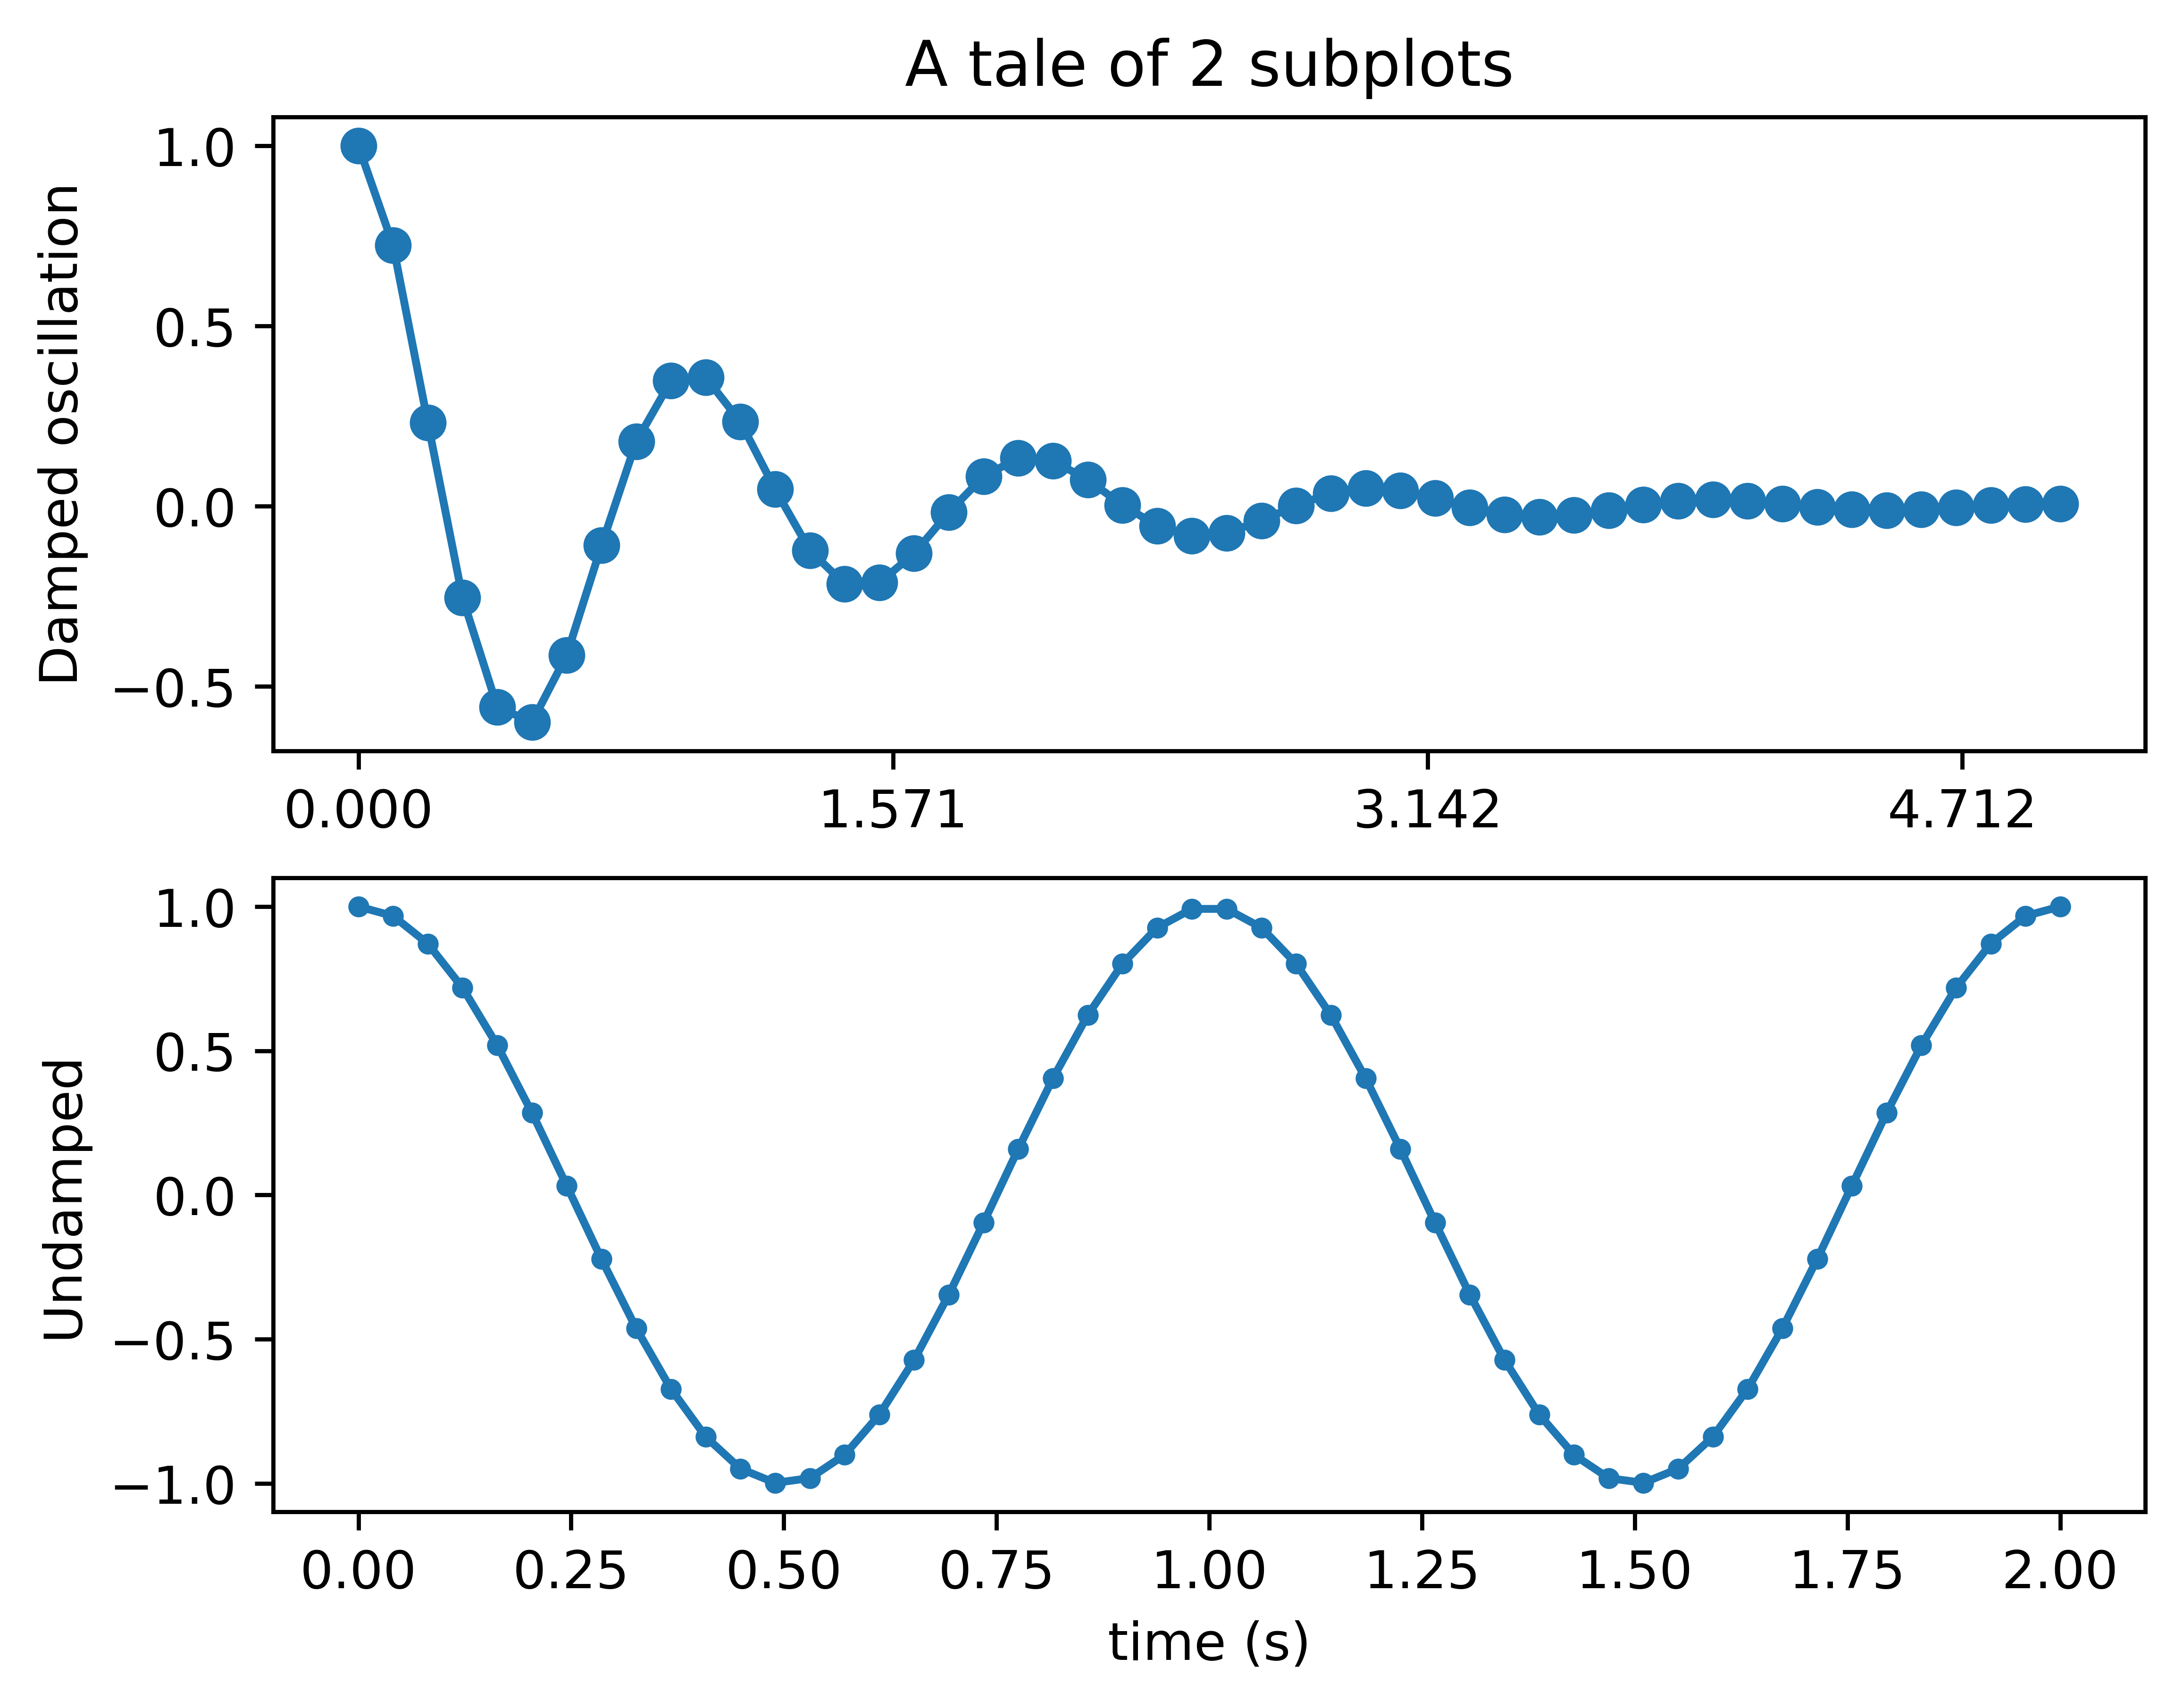

In [2]:
"""
Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')
plt.xticks([0., .5*np.pi, np.pi, 1.5*np.pi])

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

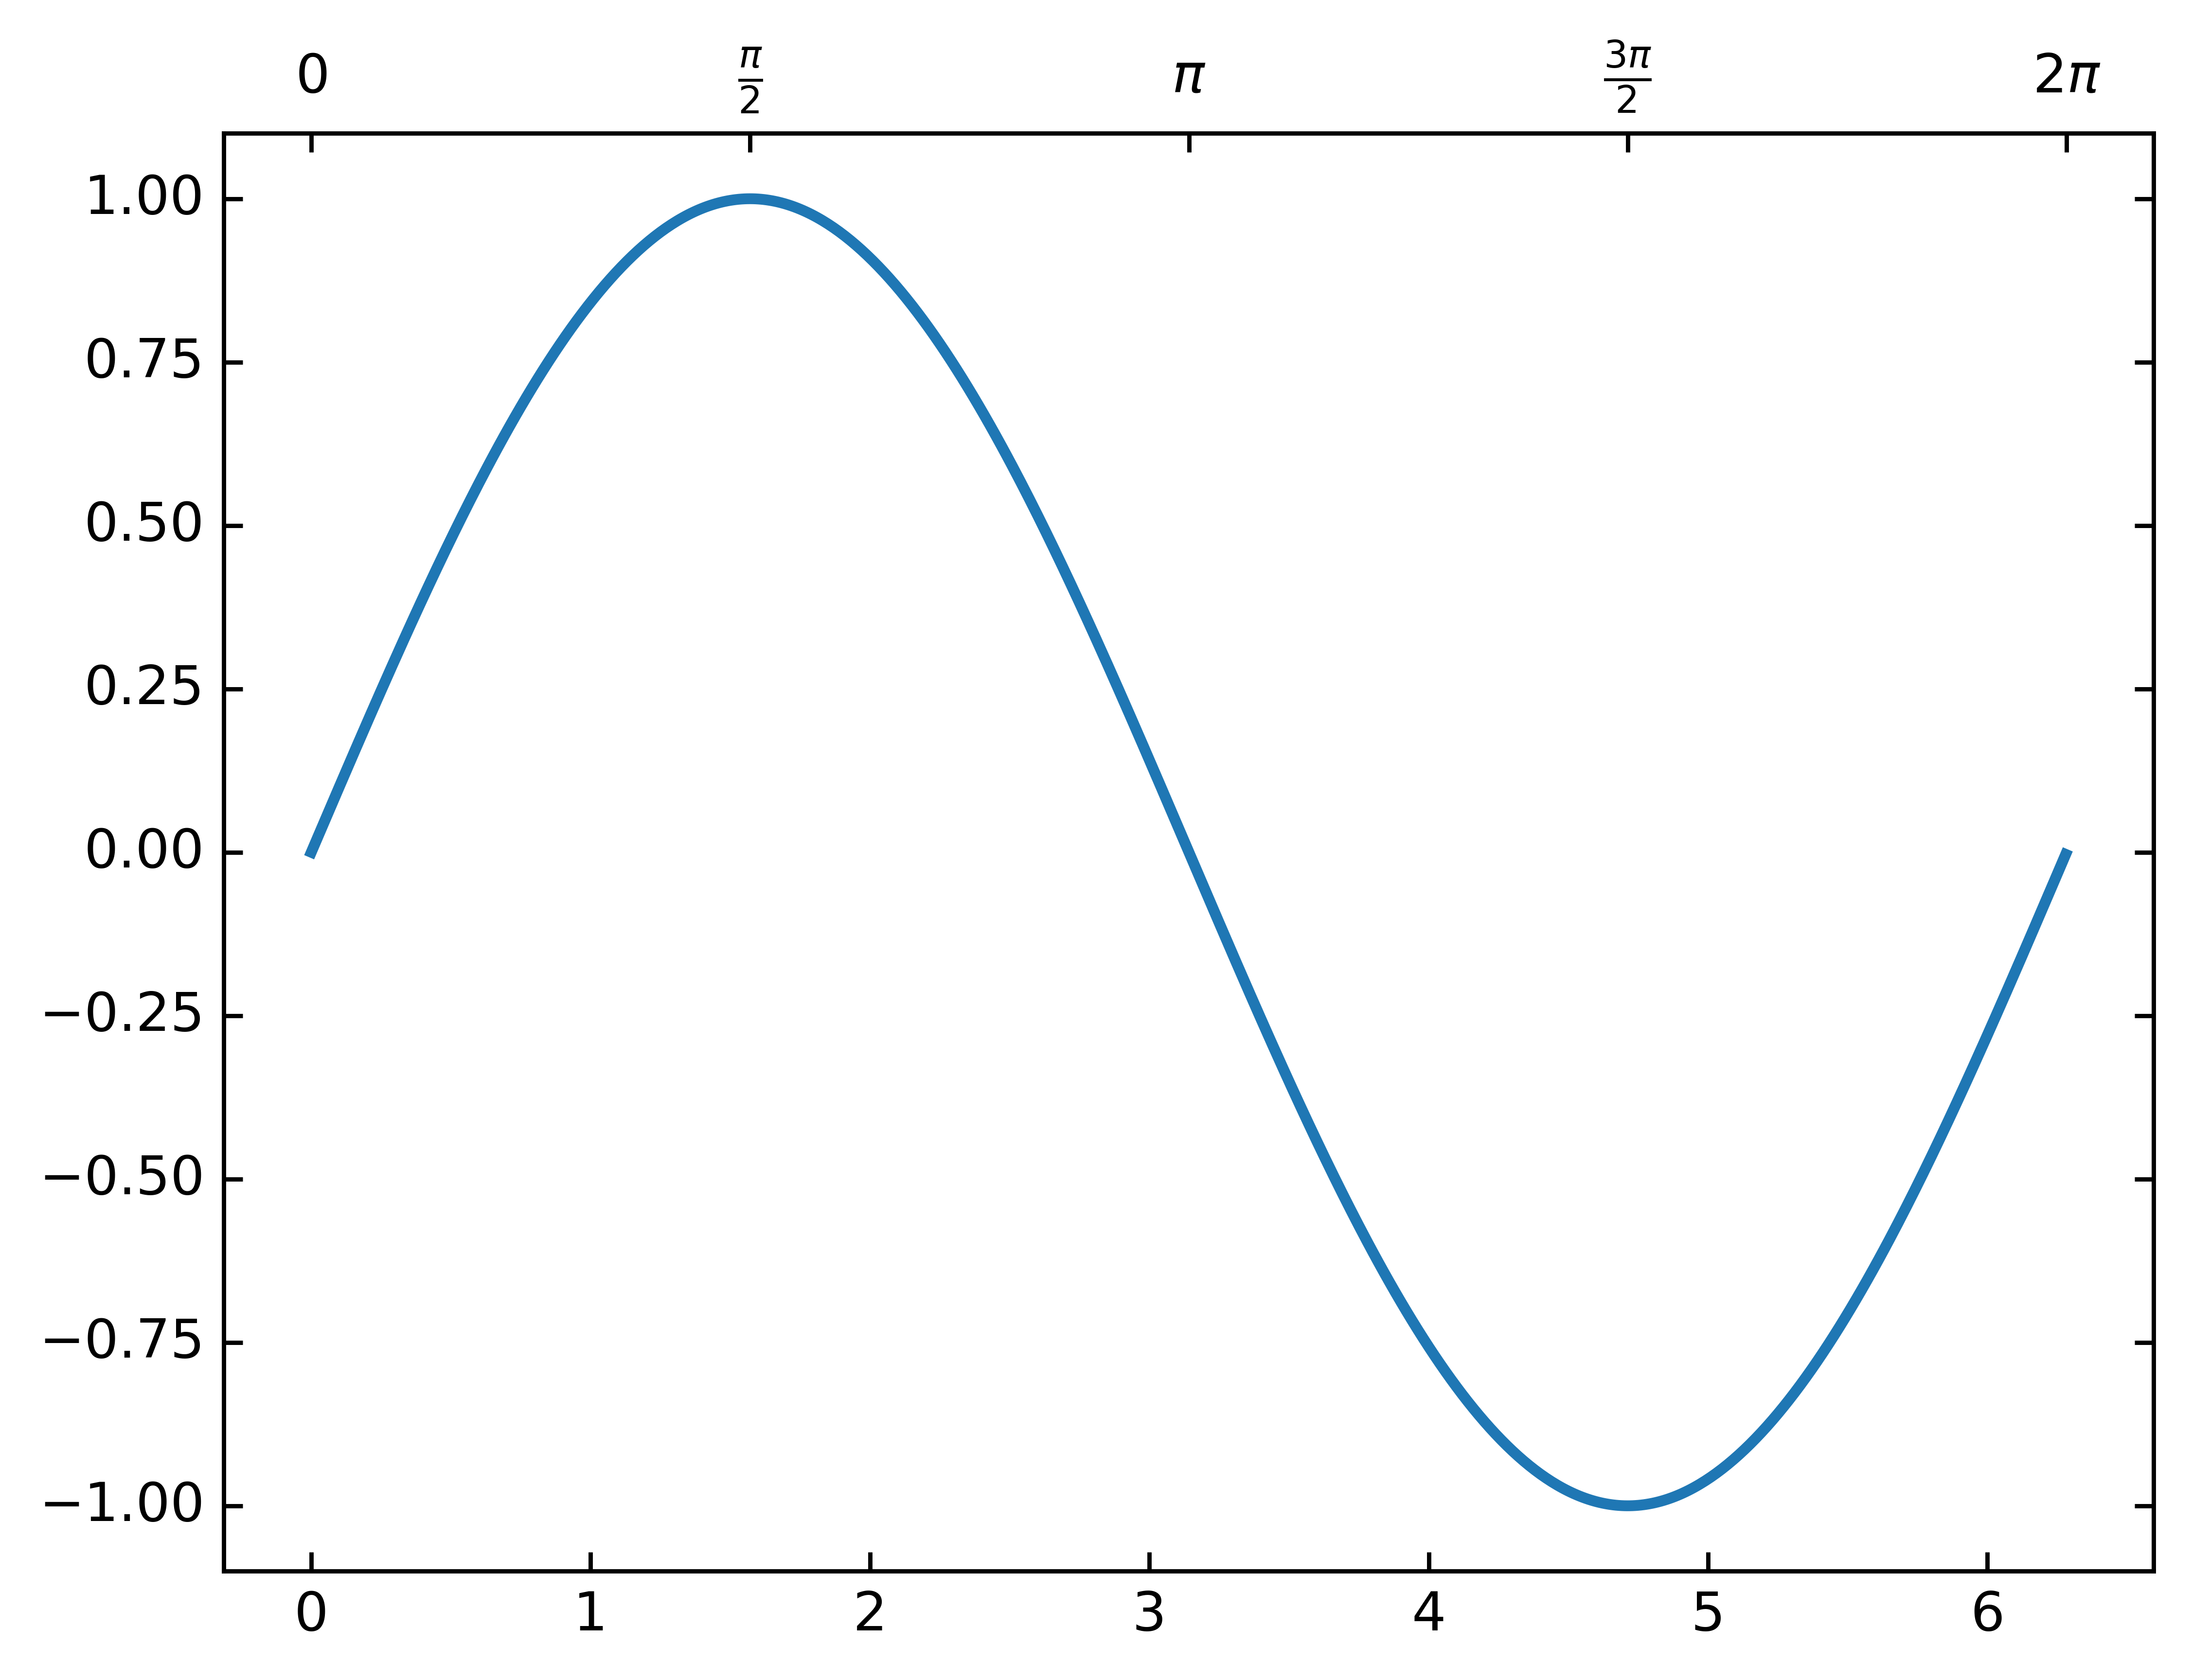

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import numpy as np

ax = host_subplot(111, axes_class=AA.Axes)
xx = np.arange(0, 2*np.pi, 0.01)
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)
yp = None
xi = np.linspace(x[0], x[-1], 100)
# yi = stineman_interp(xi, x, y, yp)
ax.plot(xx, np.sin(xx), linewidth=2)
# ax.plot(xi, yi, '.')

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis
ax2.set_xticks([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax2.set_xticklabels(["$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])

ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)

plt.show()

### log plot

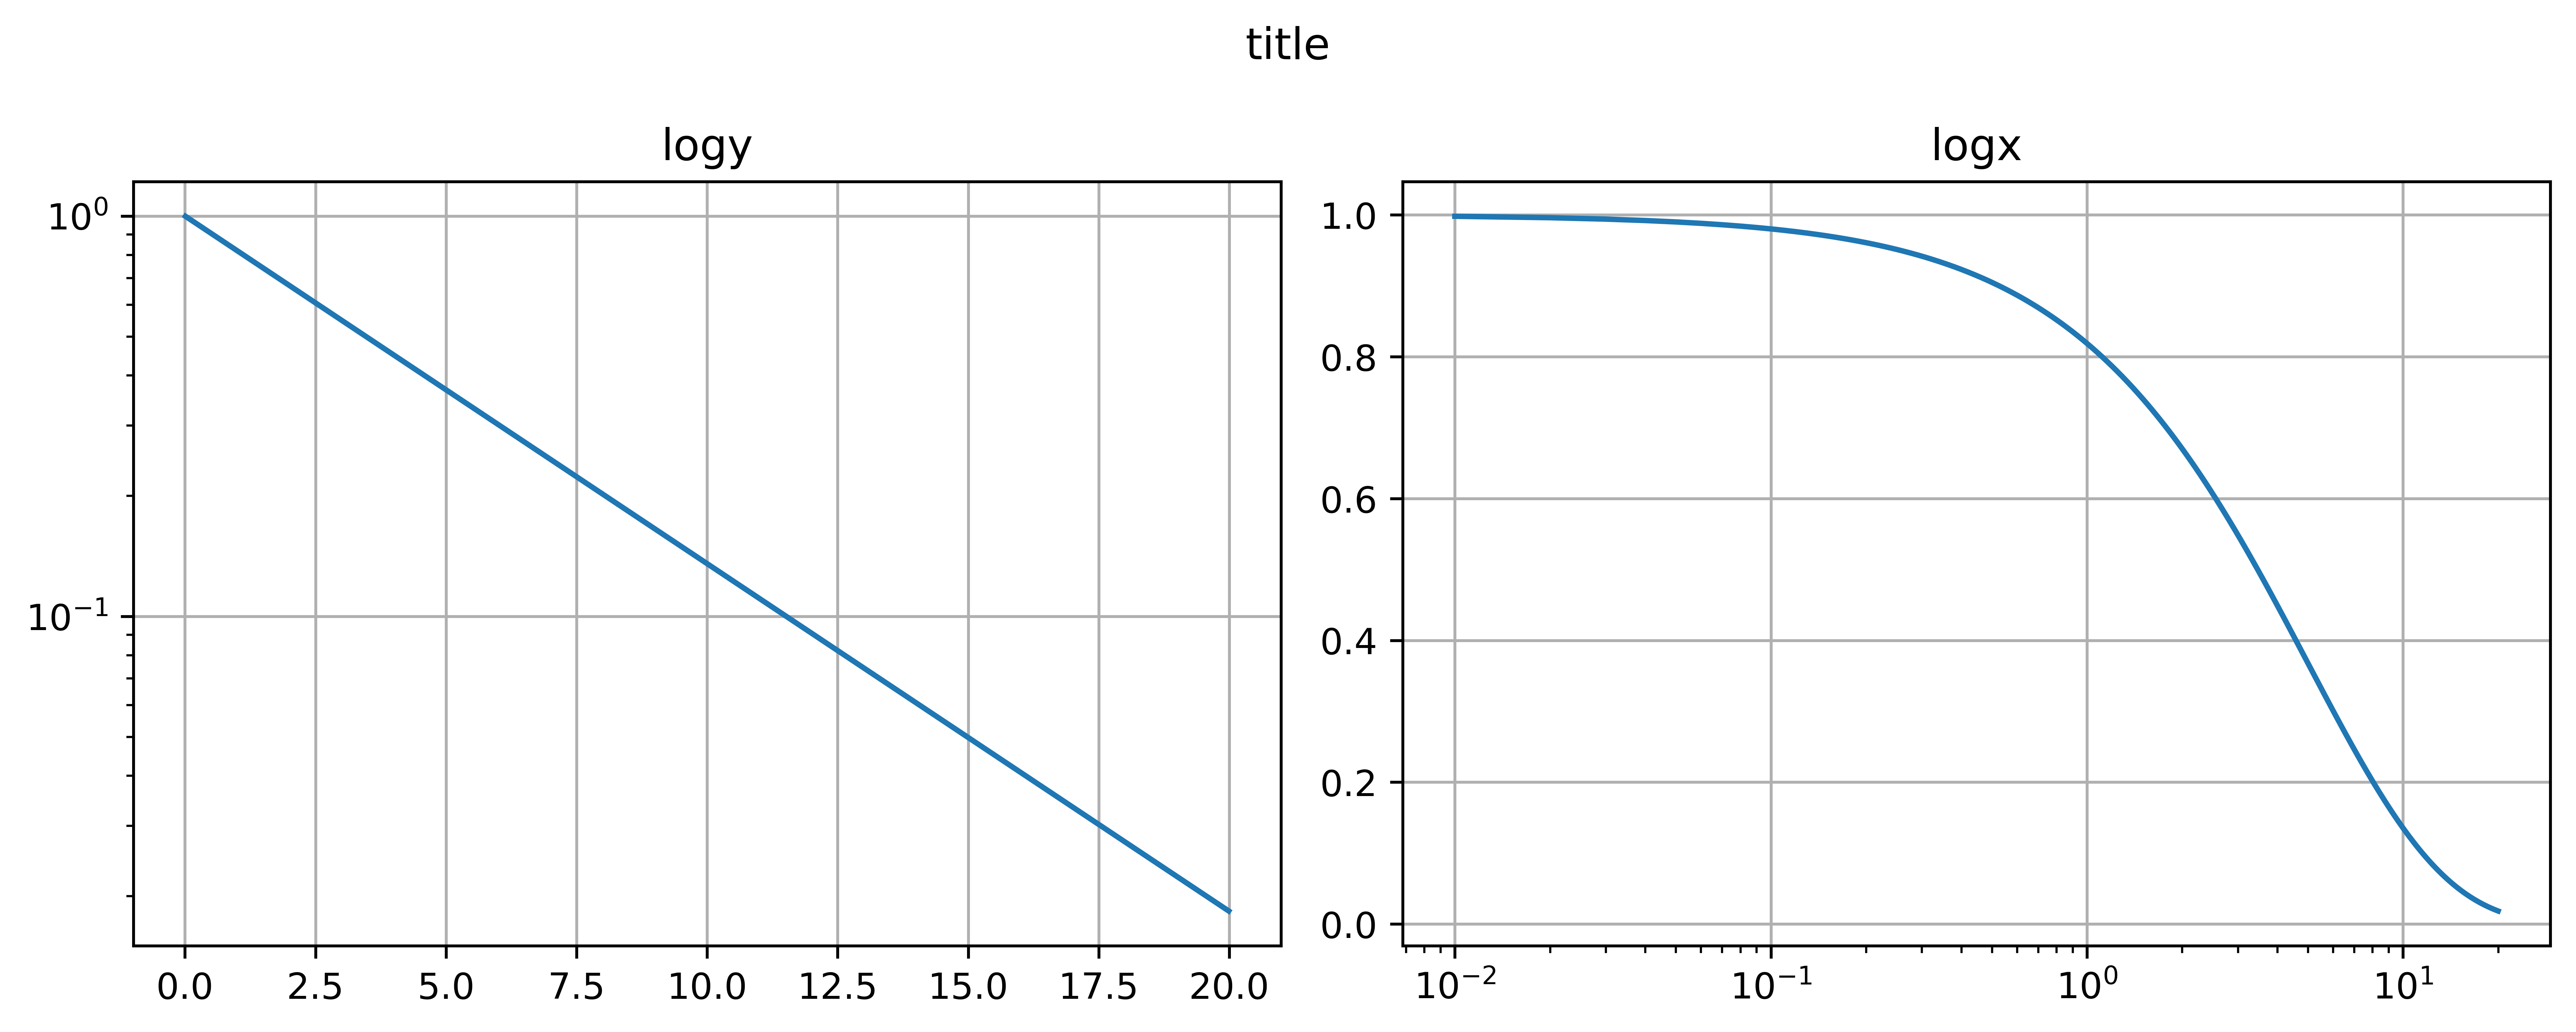

In [4]:
import matplotlib.pyplot as plt
import numpy as np

dt = 0.01
t = np.arange(dt, 20.0, dt)


fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.semilogy(t, np.exp(-t/5.0))
ax0.grid(True)
ax0.set_title('logy')

ax1.semilogx(t, np.exp(-t/5.0))
ax1.grid(True)
ax1.set_title('logx')

fig.suptitle('title')
fig.tight_layout()

fig.savefig('subplot.pdf', transparent=True, dpi=300)
plt.show()

## Animation

step 0


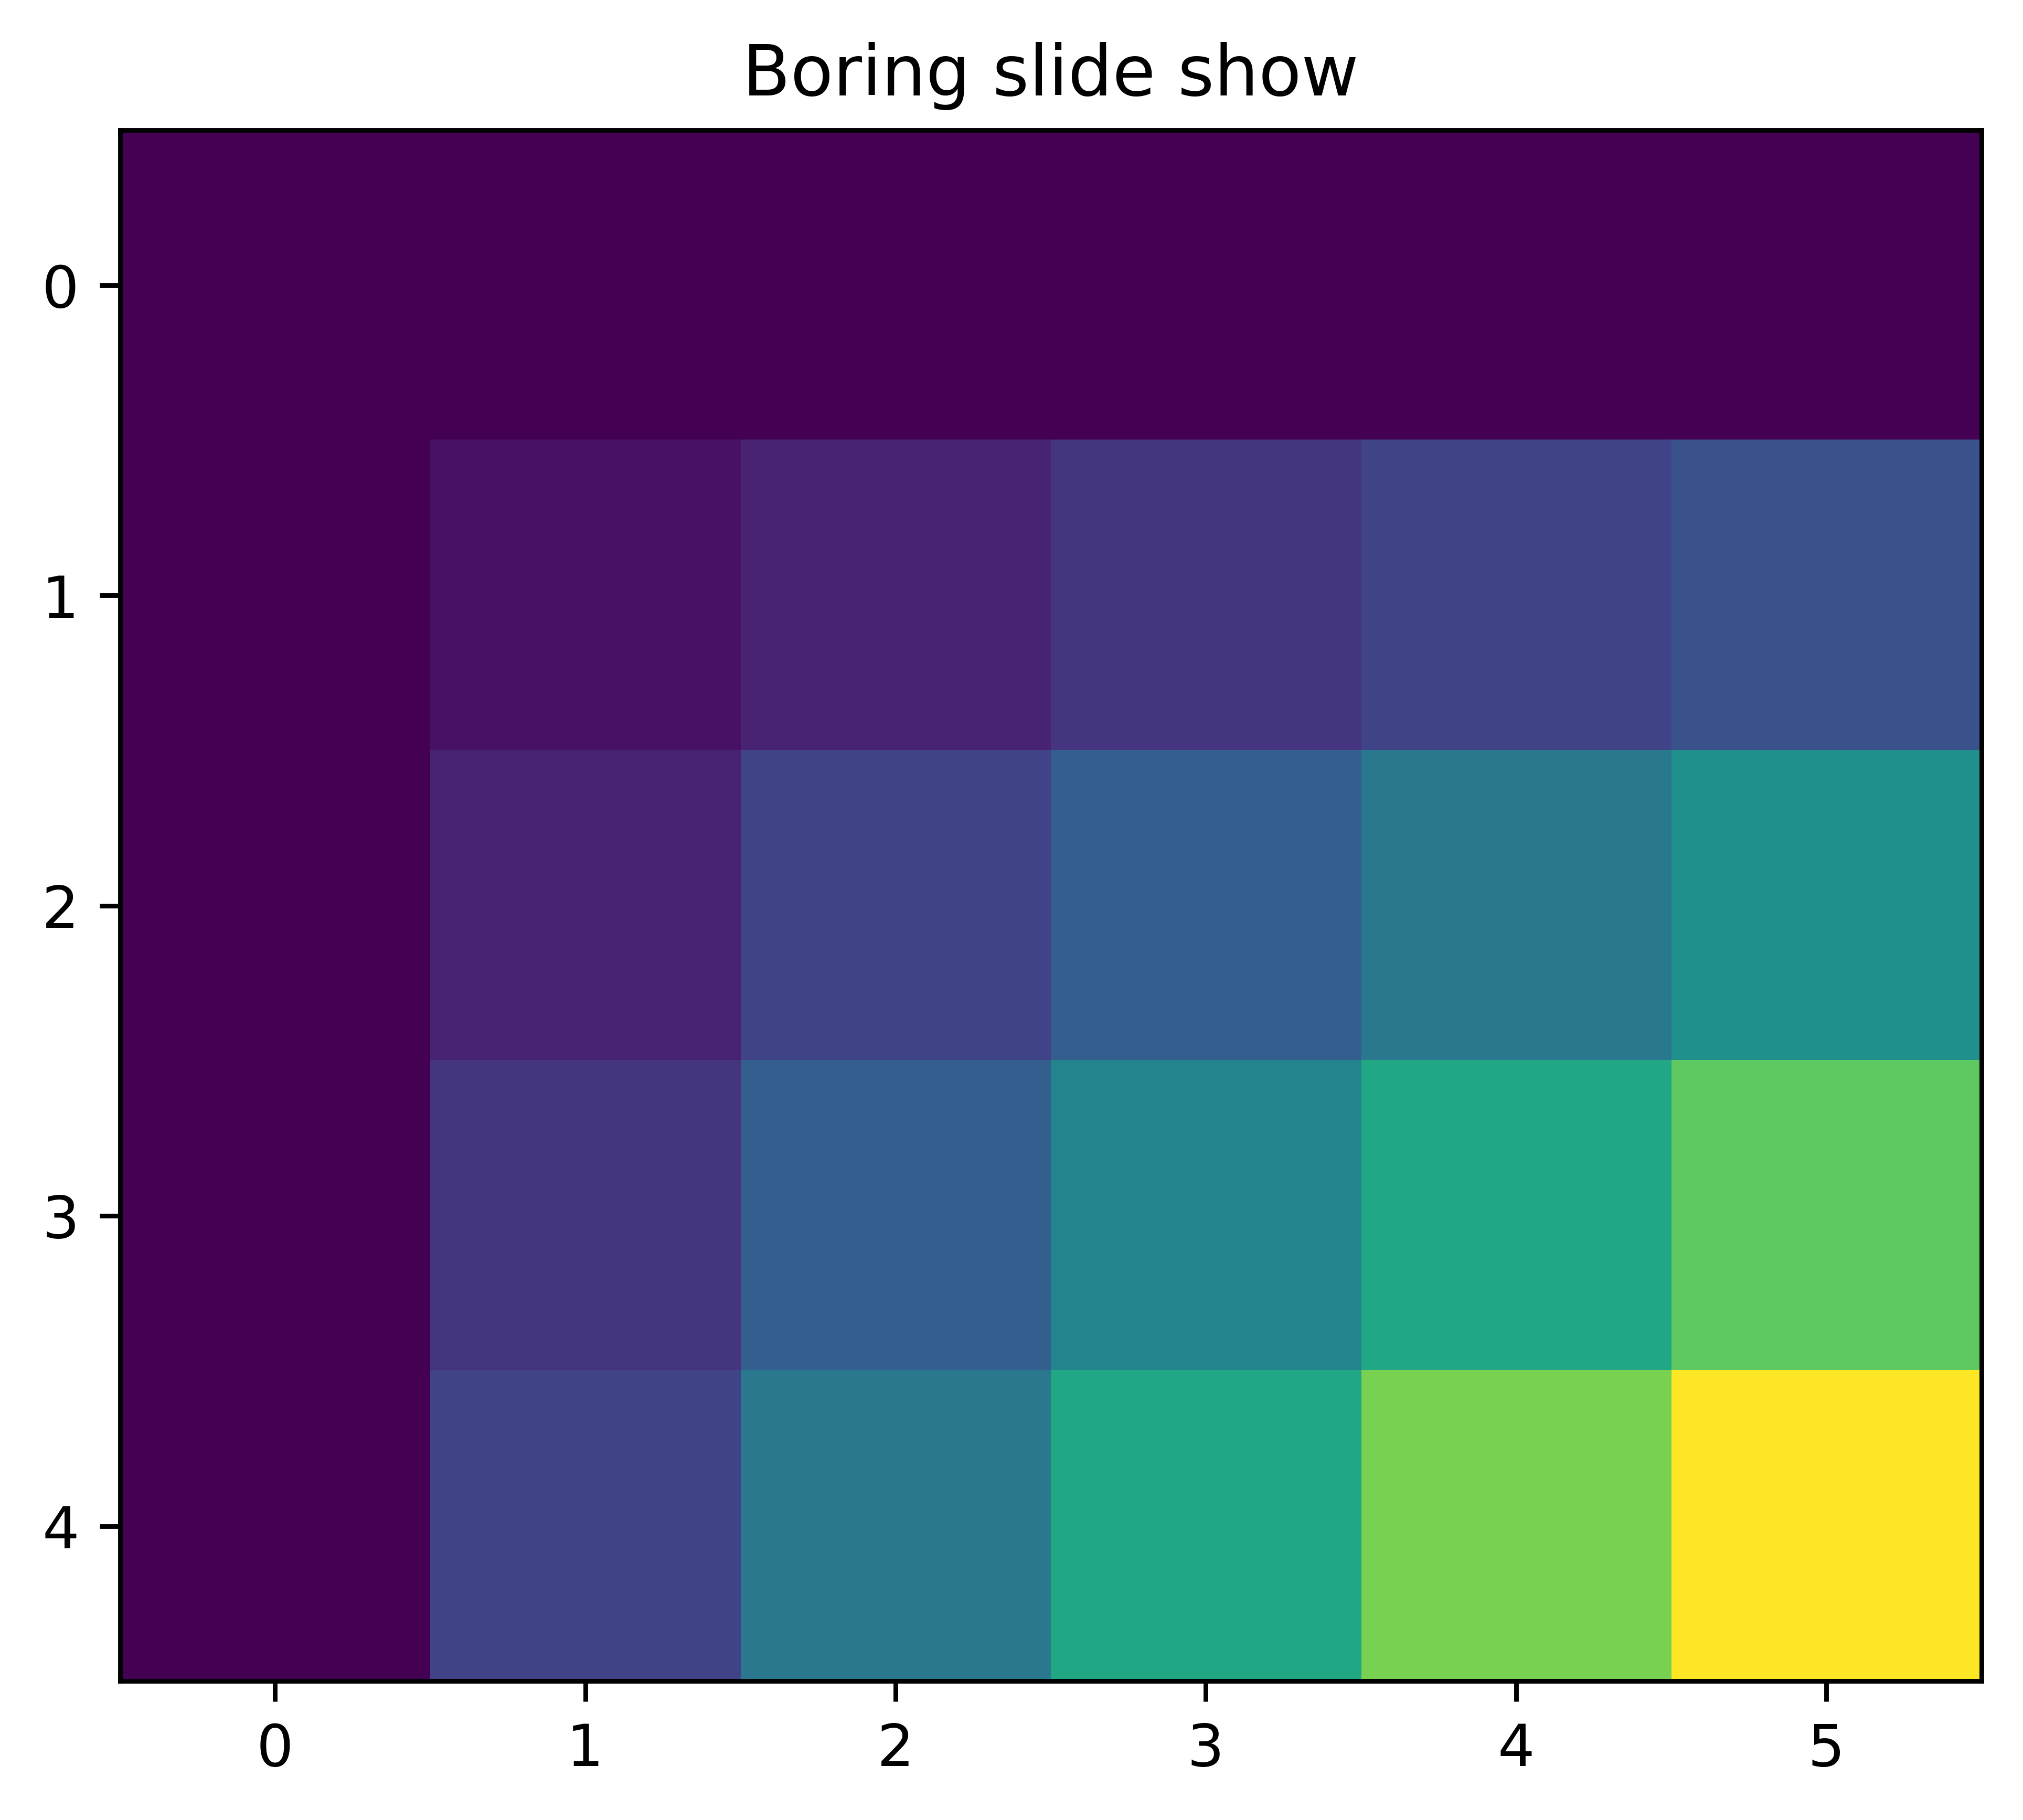

step 1
step 2


step 3
step 4


In [5]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

x = np.arange(6)
y = np.arange(5)
z = x * y[:, np.newaxis]

for i in range(5):
    if i == 0:
        p = plt.imshow(z)
        fig = plt.gcf()
        plt.clim()   # clamp the color limits
        plt.title("Boring slide show")
    else:
        z = z + 20
        p.set_data(z)
        fig.canvas.draw()

    print("step", i)
    plt.pause(0.1)

In [6]:
import numpy as np
import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 300

import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots(figsize=(6, 4))

# x = np.array([1,2,3,4,5,6,7,8,9,10])
# y =[5,6,2,3,13,4,1,2,4,8]

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_xlim(-1, 10)
ax.set_ylim(0, 11)
for i in range(10):
    ax.scatter(i, i+1, c='r', marker='o')
    fig.canvas.draw()
    plt.pause(0.1)
#     plt.show()
# plt.savefig('animation.pdf',transparent=True, dpi=300)

<IPython.core.display.Javascript object>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import time

fig = plt.figure()
fig.show()

for j in range(5):            
    plt.plot(range(0, j), [1/(i+1) for i in range(0, j)])
    fig.canvas.draw()
    time.sleep(0.1)      

<IPython.core.display.Javascript object>

## Histogram plot

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 50)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n


# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T

# get the Path object
barpath = path.Path.make_compound_path_from_polys(XY)

# make a patch out of it
patch = patches.PathPatch(barpath)
ax.add_patch(patch)

# update the view limits
ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

plt.show()

<IPython.core.display.Javascript object>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

x = np.random.normal(5, 2, 10000)
y = np.random.normal(2, 0.1, 30000)

xweights = 100 * np.ones_like(x) / x.size
yweights = 100 * np.ones_like(y) / y.size

fig, ax = plt.subplots()
ax.hist(x, weights=xweights, color='lightblue', alpha=0.5)
ax.hist(y, weights=yweights, color='salmon', alpha=0.5)

ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.show()

<IPython.core.display.Javascript object>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

mu = 200
sigma = 25
x = np.random.normal(mu, sigma, size=100)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax0.hist(x, 20, histtype='stepfilled', facecolor='g', alpha=0.75)
# ax0.hist(x, 20, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('stepfilled')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, histtype='bar', rwidth=0.8)
# ax1.hist(x, bins, normed=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

## 3D plot

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 2560x1920 with 0 Axes>

### Lorenz Attractor

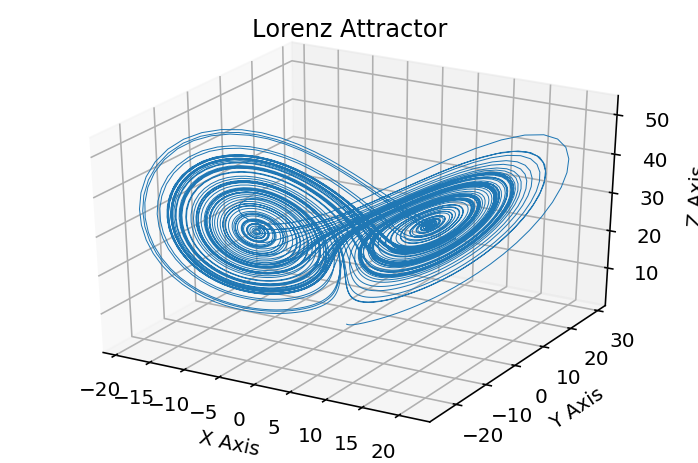

In [5]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['figure.dpi'] = 300

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

dt = 0.01
stepCnt = 10000

# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

### Plot a 3D surface with a triangular mesh

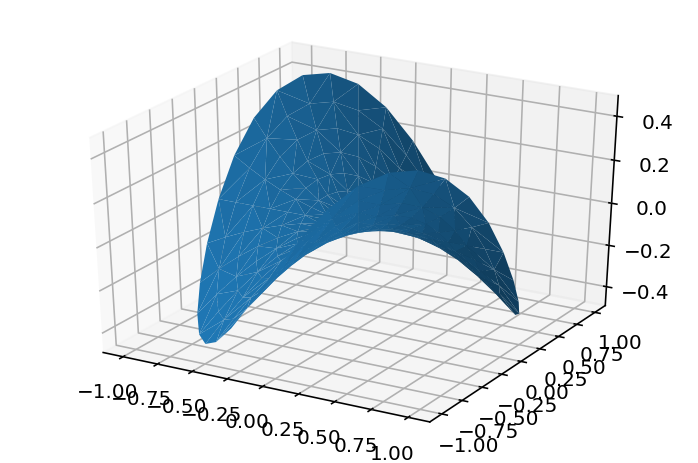

In [11]:
'''
======================
Triangular 3D surfaces
======================

Plot a 3D surface with a triangular mesh.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

### 3D surface with polar coordinates

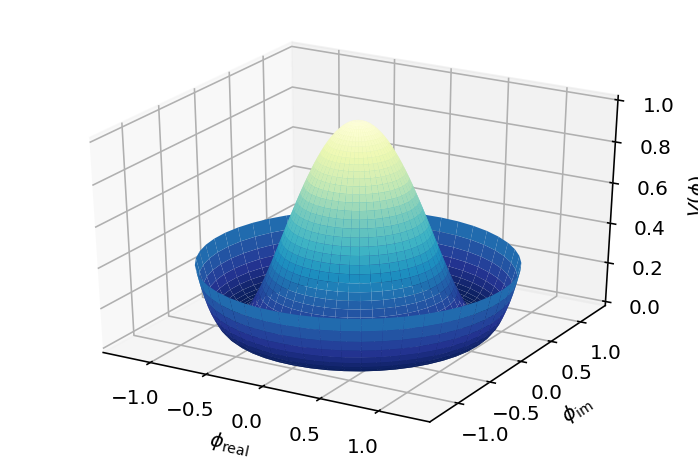

In [12]:
'''
=================================
3D surface with polar coordinates
=================================

Demonstrates plotting a surface defined in polar coordinates.
Uses the reversed version of the YlGnBu color map.
Also demonstrates writing axis labels with latex math mode.

Example contributed by Armin Moser.
'''

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

#### test h4 title

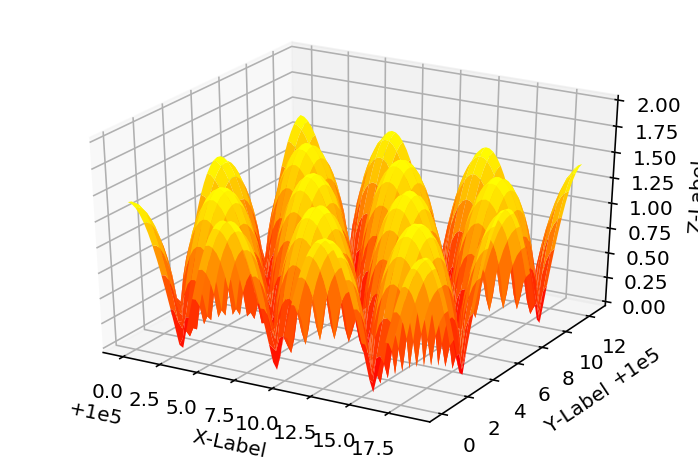

In [67]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# This example demonstrates mplot3d's offset text display.
# As one rotates the 3D figure, the offsets should remain oriented
# same way as the axis label, and should also be located "away"
# from the center of the plot.
#
# This demo triggers the display of the offset text for the x and
# y axis by adding 1e5 to X and Y. Anything less would not
# automatically trigger it.

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.mgrid[0:6*np.pi:0.25, 0:4*np.pi:0.25]
Z = np.sqrt(np.abs(np.cos(X) + np.cos(Y)))

surf = ax.plot_surface(X + 1e5, Y + 1e5, Z, cmap='autumn', cstride=2, rstride=2)
ax.set_xlabel("X-Label")
ax.set_ylabel("Y-Label")
ax.set_zlabel("Z-Label")
ax.set_zlim(0, 2)

plt.show()